Found 153 files


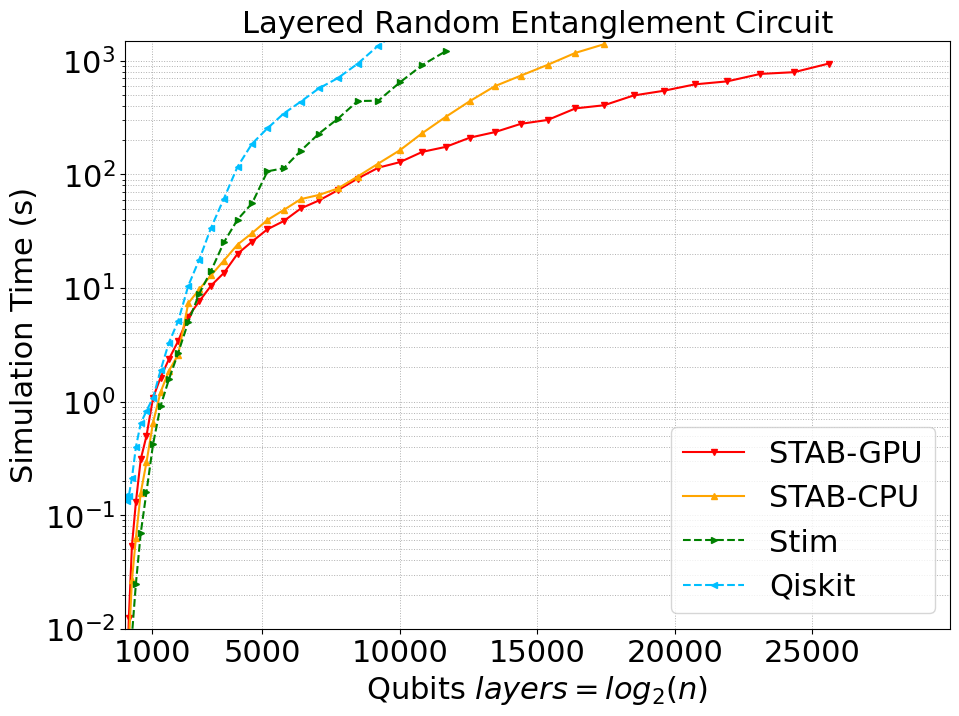

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "n_qubits"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return all_data

def plot_data(all_data):
    sim_times_nvgpu = []
    sim_times_cpu = []
    sim_times_stim = []
    sim_times_cirq = []
    sim_times_qiskit = []
    n_qubits_nvgpu = []
    n_qubits_cpu = []
    n_qubits_stim = []
    n_qubits_cirq = []
    n_qubits_qiskit = []

    for data in all_data:
        if data["sim_name"] == "nvgpu":
            n_qubits_nvgpu.append(float(data["n_qubits"]))
            sim_times_nvgpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "cpu":
            n_qubits_cpu.append(float(data["n_qubits"]))
            sim_times_cpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim":
            n_qubits_stim.append(float(data["n_qubits"]))
            sim_times_stim.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit":
            n_qubits_qiskit.append(float(data["n_qubits"]))
            sim_times_qiskit.append(float(data["sim_time"]))



    n_qubits_nvgpu, sim_times_nvgpu = zip(*sorted(zip(n_qubits_nvgpu, sim_times_nvgpu))) if n_qubits_nvgpu else ([], [])
    n_qubits_cpu, sim_times_cpu = zip(*sorted(zip(n_qubits_cpu, sim_times_cpu))) if n_qubits_cpu else ([], [])

    n_qubits_stim, sim_times_stim = zip(*sorted(zip(n_qubits_stim, sim_times_stim))) if n_qubits_stim else ([], [])
    n_qubits_qiskit, sim_times_qiskit = zip(*sorted(zip(n_qubits_qiskit, sim_times_qiskit))) if n_qubits_qiskit else ([], [])


    plt.figure(figsize=(10, 7))

    plt.plot(n_qubits_nvgpu, sim_times_nvgpu, "v-",label="STAB-GPU", color="red", markersize=5)
    plt.plot(n_qubits_cpu, sim_times_cpu, "^-",label="STAB-CPU", color="orange", markersize=5)

    plt.plot(n_qubits_stim, sim_times_stim, ">--", label="Stim", color="green", markersize=5)
    plt.plot(n_qubits_qiskit, sim_times_qiskit, "<--", label="Qiskit", color="deepskyblue", markersize=5)


    plt.xlabel(r"Qubits $layers=log_{2}(n)$", fontsize=22)
    plt.ylabel("Simulation Time (s)", fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    # plt.xscale("log", base=2) 
    plt.yscale("log", base=10)

    plt.ylim(0.01, 1500)
    plt.xlim(0, 30000)
    plt.xticks([1000, 5000, 10000, 15000, 20000, 25000])
    plt.title("Layered Random Entanglement Circuit",fontsize=22)
    plt.legend(fontsize=22)
    plt.grid(True, linestyle=":", linewidth=0.7, which="both")

    plt.legend(fontsize=22)
    plt.subplots_adjust(top=0.95, right=0.95)

    plt.savefig("graphics/random_plot.pdf", format="pdf")

    plt.show()


folder_path = "sim_bench"  
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)

Found 154 files


/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_30252/1647886029.py:50: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "v-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_stab, sim_times_stab, "v-", label="STAB-GPU", linestyle="-", color="red", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_30252/1647886029.py:51: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_cpu, sim_times_cpu, "^-", label="STAB-CPU", linestyle="-", color="orange", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_30252/1647886029.py:52: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ">-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(distance_stim, s

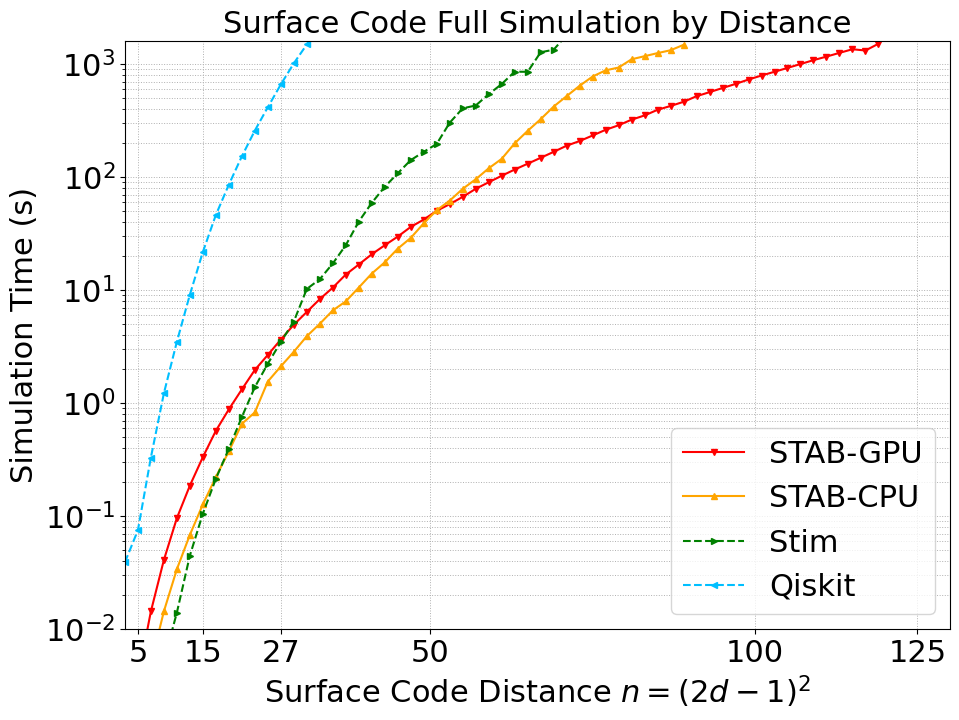

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "distance", "rounds", "n_qubits"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return sorted(all_data, key=lambda x: x["distance"])  #Sort by sim time

def plot_data(all_data):
    sim_times_stab = []
    sim_times_stim = []
    distance_stab = []
    distance_stim = []
    sim_times_cpu = []
    distance_cpu = []
    sim_times_qiskit= []
    distance_qiskit = []

    for data in all_data:
        if data["sim_name"] == "nvgpu":
            distance_stab.append(float(data["distance"]))
            sim_times_stab.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim":
            distance_stim.append(float(data["distance"]))
            sim_times_stim.append(float(data["sim_time"]))
        elif data["sim_name"] == "cpu":
            distance_cpu.append(float(data["distance"]))
            sim_times_cpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit":
            distance_qiskit.append(float(data["distance"]))
            sim_times_qiskit.append(float(data["sim_time"]))

    plt.figure(figsize=(10, 7))
    plt.plot(distance_stab, sim_times_stab, "v-", label="STAB-GPU", linestyle="-", color="red", markersize=5)
    plt.plot(distance_cpu, sim_times_cpu, "^-", label="STAB-CPU", linestyle="-", color="orange", markersize=5)
    plt.plot(distance_stim, sim_times_stim, ">-", label="Stim", linestyle="--", color="green", markersize=5)
    plt.plot(distance_qiskit, sim_times_qiskit, "<-", label="Qiskit", linestyle="--", color="deepskyblue", markersize=5)

    plt.xlabel(r"Surface Code Distance $n=(2d-1)^2$", fontsize=22)
    plt.ylabel("Simulation Time (s)", fontsize=22)
    plt.title("Surface Code Full Simulation by Distance", fontsize=22)
    
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    plt.ylim(.01, 1600)
    plt.xlim(3, 130)
    plt.yscale("log", base=10)
    
    plt.xticks([5, 15, 27, 50, 100, 125], labels=[str(x) for x in [5, 15, 27, 50, 100, 125]])

    plt.legend(fontsize=22)

    plt.grid(True, linestyle=":", linewidth=0.7, which="both")

    plt.subplots_adjust(top=0.95, right=0.95)

    plt.savefig("graphics/fowler_surface_code.pdf", format="pdf")

    plt.show()

folder_path = "fowler_surface_code"  
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)
